In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 주제 
#### 💡 비트코인의 총 시장가치를 회귀분석을 통해 예측해보자

#### 컬럼별 설명 
> 시작 : 데이터 기록의 시작 날짜를 나타냅니다.
> 
> 종료 : 데이터 기록의 종료 날짜를 나타냅니다.
> 
> 시가 : 비트코인이 당일 거래를 시작한 가격입니다.
> 
> 높음 : 하루 동안 비트코인이 도달한 최고 가격입니다.
> 
> 낮음 : 하루 동안 비트코인이 도달한 최저 가격입니다.
> 
> 마감 : 비트코인이 하루 마감 시 거래를 종료한 가격입니다.
> 
> 거래량 : 당일 거래된 비트코인의 총 거래량입니다.
> 
> 시가총액 : 당일 종료 시 비트코인의 총 시장 가치입니다.

In [2]:
df = pd.read_csv('./datasets/bitcoin_2010-07-27_2024-04-25.csv')
df

,Start,End,Open,High,Low,Close,Volume,Market Cap
0,2024-04-24,2024-04-25,66553.5400,67070.4000,63742.7300,64291.0700,1.384736e+11,1.294489e+12
1,2024-04-23,2024-04-24,66761.0200,67174.0200,65884.1500,66386.6100,1.408621e+11,1.308576e+12
2,2024-04-22,2024-04-23,64952.0200,67180.0300,64598.0000,66818.8900,1.400725e+11,1.299703e+12
3,2024-04-21,2024-04-22,64875.7500,65638.7400,64302.4700,64896.8700,1.326574e+11,1.278730e+12
4,2024-04-20,2024-04-21,63824.0600,65351.3300,63321.1900,64857.9900,1.537410e+11,1.263725e+12
...,...,...,...,...,...,...,...,...
5016,2010-07-31,2010-08-01,0.0679,0.0679,0.0679,0.0679,0.000000e+00,0.000000e+00
5017,2010-07-30,2010-07-31,0.0627,0.0627,0.0627,0.0627,0.000000e+00,0.000000e+00
5018,2010-07-29,2010-07-30,0.0699,0.0699,0.0699,0.0699,0.000000e+00,0.000000e+00
5019,2010-07-28,2010-07-29,0.0589,0.0589,0.0589,0.0589,0.000000e+00,0.000000e+00


In [3]:
df.isna().sum()

Start         0
End           0
Open          0
High          0
Low           0
Close         0
Volume        0
Market Cap    0
dtype: int64

In [4]:
df.duplicated().sum()

0

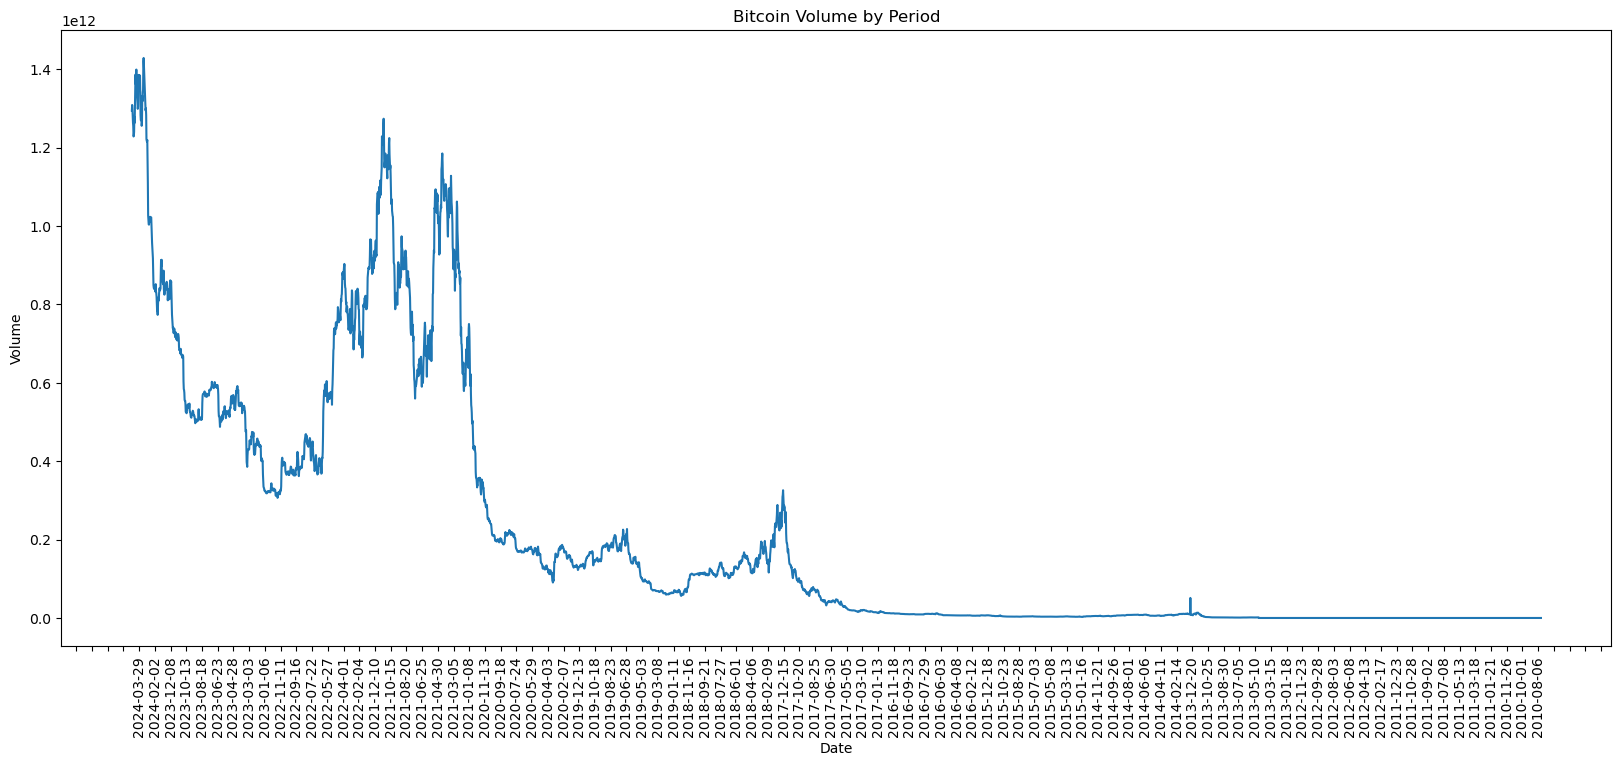

In [5]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(20, 8))

# 4주 단위로 x 축의 눈금 설정
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=8))
ax.plot(df['Start'], df['Market Cap'])
plt.xticks(rotation=90)
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title('Bitcoin Volume by Period')
plt.show()


array([[<Axes: title={'center': 'Open'}>,
        <Axes: title={'center': 'High'}>],
       [<Axes: title={'center': 'Low'}>,
        <Axes: title={'center': 'Close'}>],
       [<Axes: title={'center': 'Volume'}>,
        <Axes: title={'center': 'Market Cap'}>]], dtype=object)

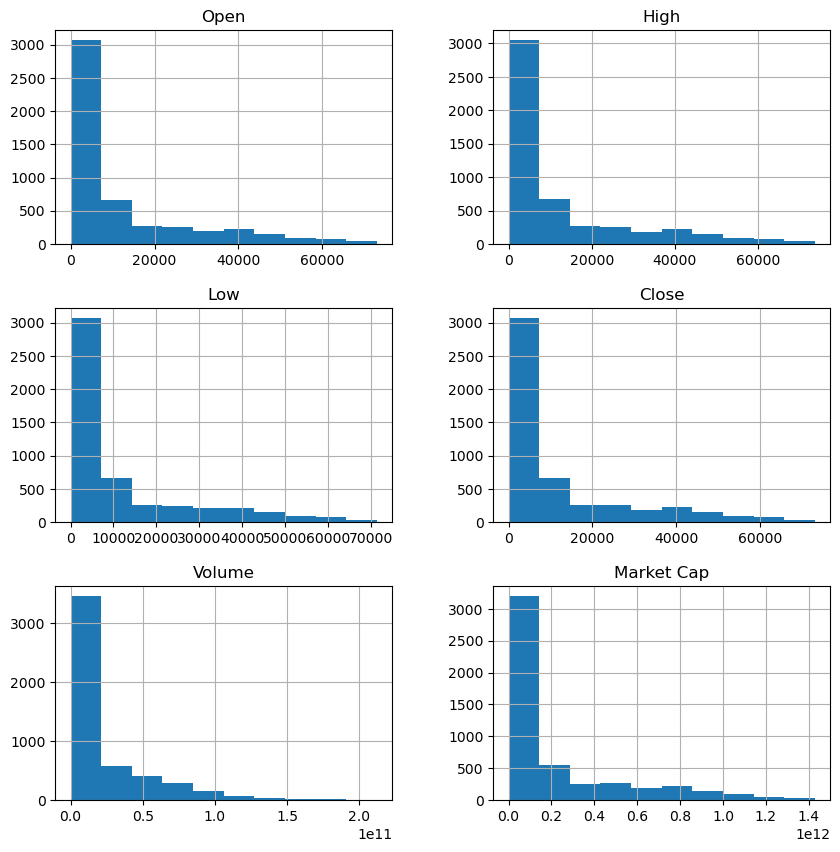

In [6]:
df.hist(figsize=(10,10))

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5021 entries, 0 to 5020
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Start       5021 non-null   object 
 1   End         5021 non-null   object 
 2   Open        5021 non-null   float64
 3   High        5021 non-null   float64
 4   Low         5021 non-null   float64
 5   Close       5021 non-null   float64
 6   Volume      5021 non-null   float64
 7   Market Cap  5021 non-null   float64
dtypes: float64(6), object(2)
memory usage: 313.9+ KB


In [8]:
df = df.drop(labels=['Start', 'End'], axis=1)

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

features, targets = df.iloc[:,:-1] , df.iloc[:,-1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

l_r = LinearRegression()
l_r.fit(X_train, y_train)


LinearRegression()

In [18]:
import numpy as np
from sklearn.metrics import mean_squared_log_error, mean_squared_error, r2_score

def get_evaluation(y_test, prediction):
    MSE = mean_squared_error(y_test, prediction)
    RMSE = np.sqrt(MSE)
    R2 = r2_score(y_test, prediction)
    print('MSE: {:.4f}, RMSE: {:.4f},  R2: {:.4f}'\
          .format(MSE, RMSE, R2))

In [19]:
prediction = l_r.predict(X_test)
get_evaluation(y_test, prediction)

MSE: 87177745104639082496.0000, RMSE: 9336902329.1796,  R2: 0.9991


In [20]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

features, targets = df.iloc[:,:-1] , df.iloc[:,-1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

dt_r = DecisionTreeRegressor(random_state=124)
rf_r = RandomForestRegressor(random_state=124, n_estimators=100)
gb_r = GradientBoostingRegressor(random_state=124)
xgb_r = XGBRegressor()
lgb_r = LGBMRegressor(n_estimators=100)


models = [dt_r, rf_r, gb_r, xgb_r, lgb_r]
for model in models:
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    print(model.__class__.__name__)
    get_evaluation(y_test, prediction)

DecisionTreeRegressor
MSE: 64809996032545128448.0000, RMSE: 8050465578.6200,  R2: 0.9993
RandomForestRegressor
MSE: 38627308511479627776.0000, RMSE: 6215087168.4538,  R2: 0.9996
GradientBoostingRegressor
MSE: 49009612421367595008.0000, RMSE: 7000686567.8566,  R2: 0.9995
XGBRegressor
MSE: 49595394204192169984.0000, RMSE: 7042399747.5429,  R2: 0.9995
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000395 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1275
[LightGBM] [Info] Number of data points in the train set: 4016, number of used features: 5
[LightGBM] [Info] Start training from score 208871271596.494019
LGBMRegressor
MSE: 53455793357908049920.0000, RMSE: 7311346890.8203,  R2: 0.9994


In [13]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.model_selection import train_test_split
# from sklearn.model_selection import KFold

# features, targets = df.iloc[:, :-1], df.iloc[:, -1]

# X_train, X_test, y_train, y_test = \
# train_test_split(features, targets, test_size=0.2, random_state=124)

# rf_r = RandomForestRegressor(random_state=124)

# parameters = {'max_depth': [4, 5, 6], 'min_samples_split': [11,12,13], 'n_estimators': [10, 50, 100]}
# kfold = KFold(n_splits=10, random_state=124, shuffle=True)

# # grid_rf_r = GridSearchCV(rf_r, param_grid=parameters, scoring='neg_mean_squared_error', cv=kfold)
# grid_rf_r = GridSearchCV(rf_r, param_grid=parameters, scoring='r2', cv=kfold)
# grid_rf_r.fit(X_train, y_train)

In [14]:
from sklearn.preprocessing import PolynomialFeatures

features, targets = df.iloc[:, :-1], df.iloc[:, -1]

poly_features = PolynomialFeatures(degree=3).fit_transform(features)

X_train, X_test, y_train, y_test = \
train_test_split(poly_features, targets, test_size=0.2, random_state=124)

l_r = LinearRegression()
l_r.fit(X_train, y_train)

LinearRegression()

In [15]:
import numpy as np
from sklearn.metrics import mean_squared_log_error, mean_squared_error, r2_score

def get_evaluation(y_test, prediction):
    MSE = mean_squared_error(y_test, prediction)
    RMSE = np.sqrt(MSE)
    R2 = r2_score(y_test, prediction)
    print('MSE: {:.4f}, RMSE: {:.4f},  R2: {:.4f}'\
          .format(MSE, RMSE, R2))

In [16]:
prediction = l_r.predict(X_test)
get_evaluation(y_test, prediction)

MSE: 71242567173054591401984.0000, RMSE: 266913032977.1377,  R2: 0.2661


### 📌 해당 데이터는 선형 데이터 인 것을 알 수 있다.

In [24]:
from statsmodels.api import OLS

features, targets = df.iloc[:, :-1] , df.iloc[:, -1]

model = OLS(targets, features)
print(model.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:             Market Cap   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.999
Method:                 Least Squares   F-statistic:                          1.523e+06
Date:                Wed, 01 May 2024   Prob (F-statistic):                        0.00
Time:                        14:57:44   Log-Likelihood:                     -1.2259e+05
No. Observations:                5021   AIC:                                  2.452e+05
Df Residuals:                    5016   BIC:                                  2.452e+05
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [25]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

features, targets = df.iloc[:, :-1] , df.iloc[: , -1]

def get_vif(features):
    vif = pd.DataFrame()
    vif['vif_score'] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]
    vif['feature'] = features.columns
    return vif

In [26]:
get_vif(features)

,vif_score,feature
0,4072.817134,Open
1,6468.651801,High
2,3666.042187,Low
3,5220.328507,Close
4,6.346849,Volume
